Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from model_vision import BetaVAE

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "train_record"
#model_path_name = "tf_models"
model_path_name = "train_beta_vae"
# NOTE: make sure you copy the vae model you want to test from tf_vae/vae.json to tf_models/vae.json

z_size=64

In [4]:
filelist = os.listdir(DATA_DIR)

In [5]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

In [6]:
obs.shape

(1358, 64, 64, 3)

In [7]:
frame = random.choice(obs).reshape(1, 64, 64, 3)

In [18]:
vae = BetaVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=tf.AUTO_REUSE,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'b50.0_0.json'))

INFO:tensorflow:Model using cpu.


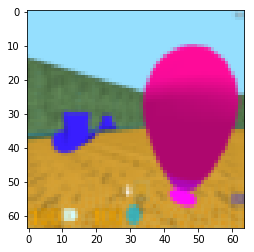

In [20]:
# show recorded frame that will be fed into the input of VAE
frame = random.choice(obs).reshape(1, 64, 64, 3)
plt.imshow(frame[0])
plt.show()

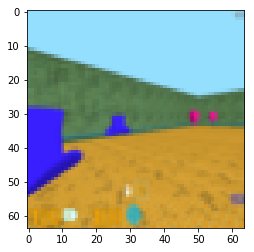

In [28]:
plt.imshow(obs[-1]); plt.show()

In [21]:

batch_z = vae.encode(frame)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)
z = np.copy(batch_z)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])
tt

[-0.8074  0.1635 -0.3604 -0.9098  0.5332  1.2582  0.1176  1.0461  0.3242  1.2643 -1.0479 -1.589
  0.9967  0.825   0.5959  0.3774  0.565  -0.8605  1.1195  0.3376 -1.3309 -0.6384 -0.746  -0.9847
 -1.0673 -1.9129  0.5137  1.6059 -0.0782 -0.3866 -0.4722 -0.9073  0.1527  0.4156  2.2032  1.6045
 -0.5131 -0.6158  3.2183 -0.4774 -0.6991 -0.6135 -0.8857 -0.5152 -1.3888 -0.7286 -0.0559 -0.4885
 -0.3603 -0.2298 -1.7046 -1.3545  0.1197 -0.729   0.3108  0.0211 -2.6404 -1.2606 -0.6203  0.3412
 -1.3033  0.592  -0.7431  0.5513]


array([[14.    ,  0.0295,  0.5959],
       [17.    ,  0.0125, -0.8605],
       [21.    ,  0.2588, -0.6384],
       [28.    ,  0.0012, -0.0782],
       [31.    ,  0.0192, -0.9073],
       [38.    ,  0.0015,  3.2183],
       [40.    ,  0.02  , -0.6991],
       [42.    ,  0.1753, -0.8857],
       [43.    ,  0.0294, -0.5152],
       [45.    ,  0.0042, -0.7286],
       [46.    ,  0.0082, -0.0559],
       [48.    ,  0.0456, -0.3603],
       [51.    ,  0.0027, -1.3545],
       [61.    ,  0.0059,  0.592 ]])

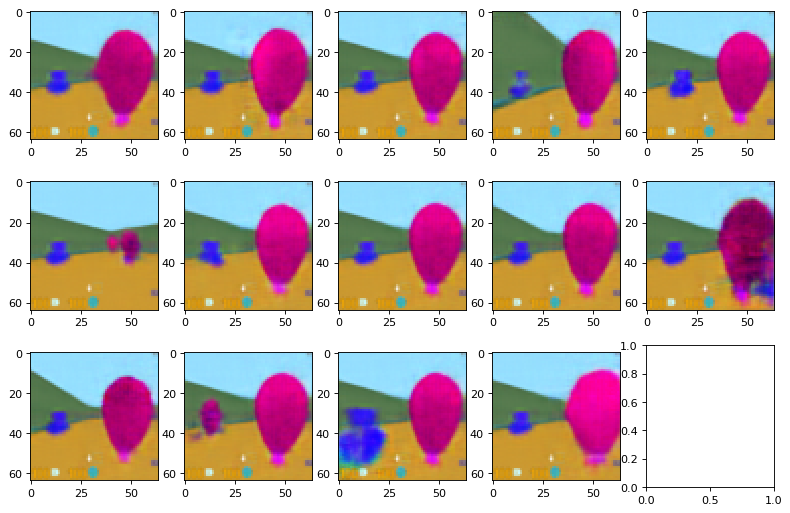

In [25]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b50.0_0.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        z = np.copy(batch_z)
        #z = np.zeros_like(batch_z)
        z[0][index[j]] += i * 0.1
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        #z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

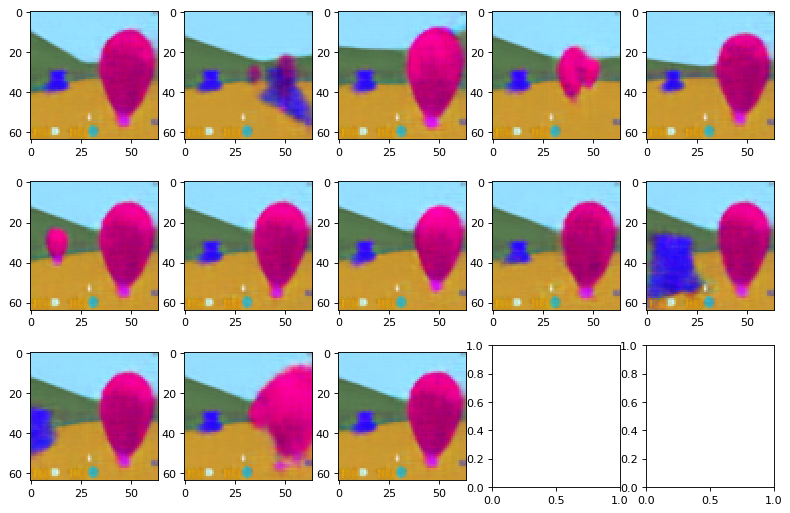

In [29]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b200.0_4.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        z = np.copy(batch_z)
        #z = np.zeros_like(batch_z)
        z[0][index[j]] += i * 0.1
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        #z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

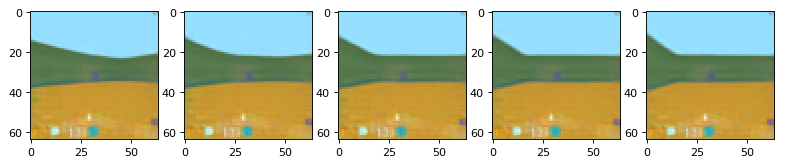

In [13]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b100.0_4.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]


fig, ax = plt.subplots(1,5, figsize=(12,3), dpi=80)
for i in range(5):
    z = np.zeros_like(batch_z)
    z[0][index[5]] = -0 + 0.5 * i
    ax[i].imshow(vae.decode(z)[0])

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
plt.show()

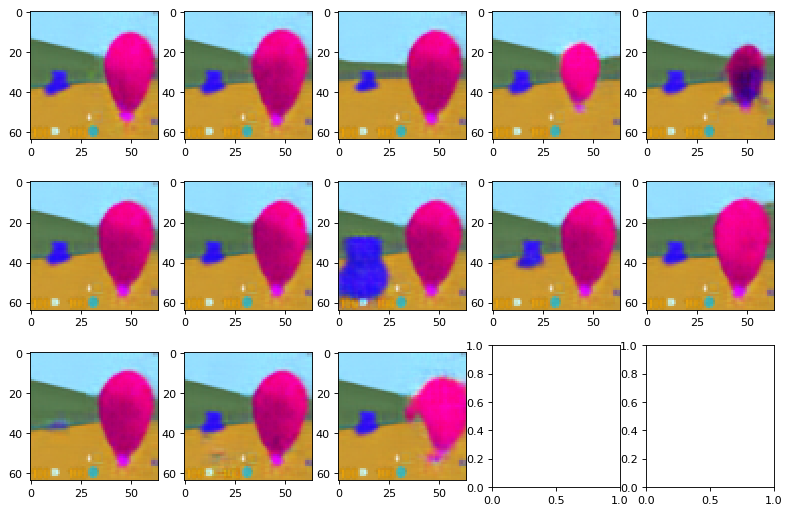

In [30]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b100.0_4.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        z = np.copy(batch_z)
        #z = np.zeros_like(batch_z)
        z[0][index[j]] += i * 0.1
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        #z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

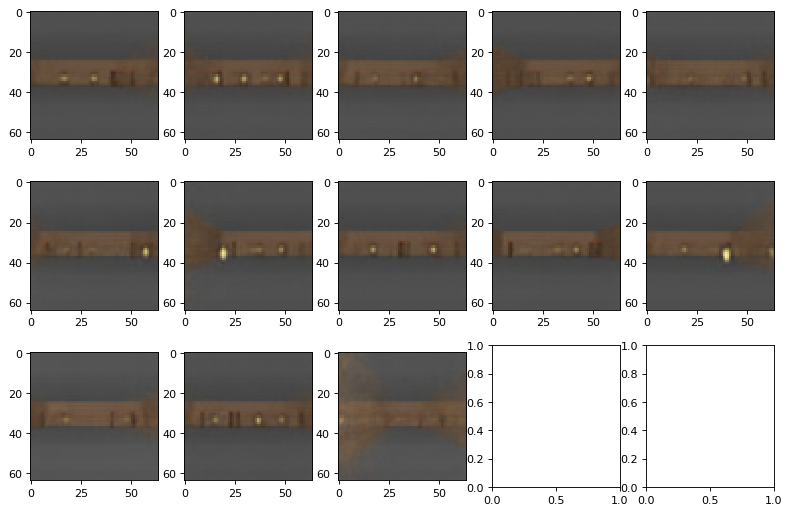

In [584]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b20.0_1.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        #z = np.copy(batch_z)
        z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

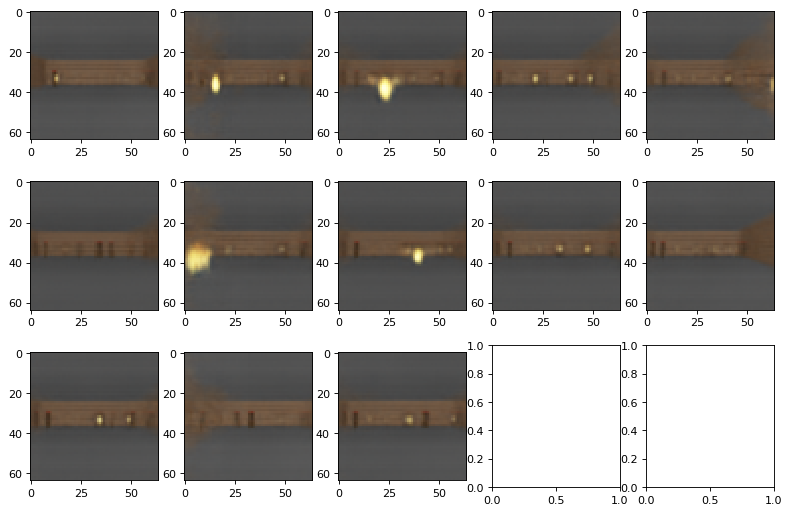

In [585]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b10.0_1.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        #z = np.copy(batch_z)
        z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())